# 問4

Windows7、 Python 3.7.0、numpy 1.15.1の環境で実装した。

関数$f(x_1, x_2) = 100(x_2 - {x_1}^2)^2 + (1 - x_1)^2$は、$(x_2 - {x_1}^2)^2 \geq 0$、
$(1 - x_1)^2 \geq 0$から、$(x_1, x_2) = (1, 1)$で最小値$0$をとる。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from optimization_report_01 import (
    objective_func, gradient_vector, hessian,
    gradient_decent, newton, quasi_newton,
    plot_result)

上でimportしているoptimization_report_01.pyのスクリプトは、この問題の回答の後に添付してある。

In [2]:
x_1 = np.array([1.2, 1.2])
x_2 = np.array([-1.2, 1])

---

まず、最急降下法を適用する。

それぞれの初期点に対して、解の挙動は下の図のようになった。

(左側の「解の挙動」の図では、勾配をわかりやすくするために、関数値の(大←→小)を背景の黒色の(濃←→淡)で表したうえで、関数値が1, 10, 100, 1000の等高線を引いてある。ニュートン法、準ニュートン法も同様。)

なお、ステップ幅$\alpha_k$はWolfeの条件を満たすようにバックトラックで求めた。

バックトラックの実装において、初期値は$\alpha = 1$、Wolfeの条件の減少条件(Almijoの条件)の定数は$c_1 = 0.0001$、曲率条件の定数は$c_2 = 0.9$、$\alpha ← \rho \alpha$の更新での定数は$\rho = 0.5$とした。

反復は5000回行った。

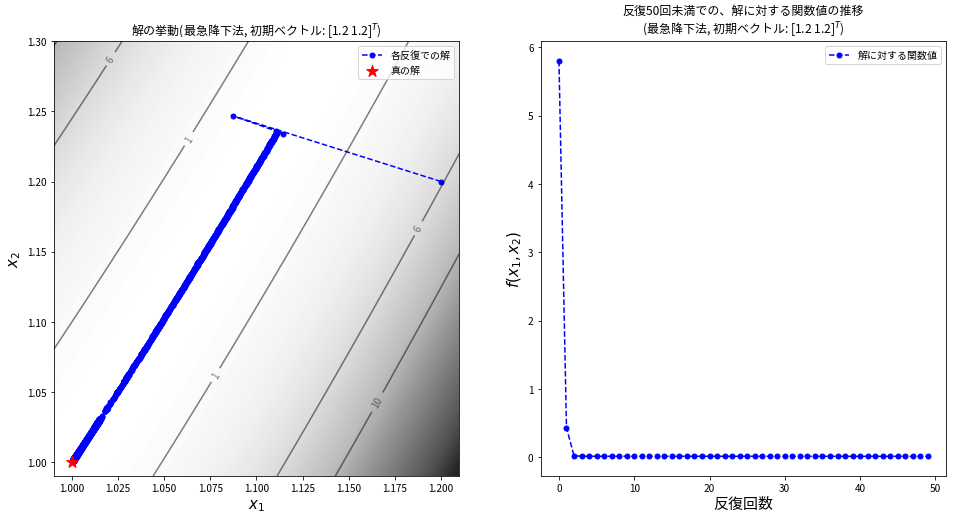

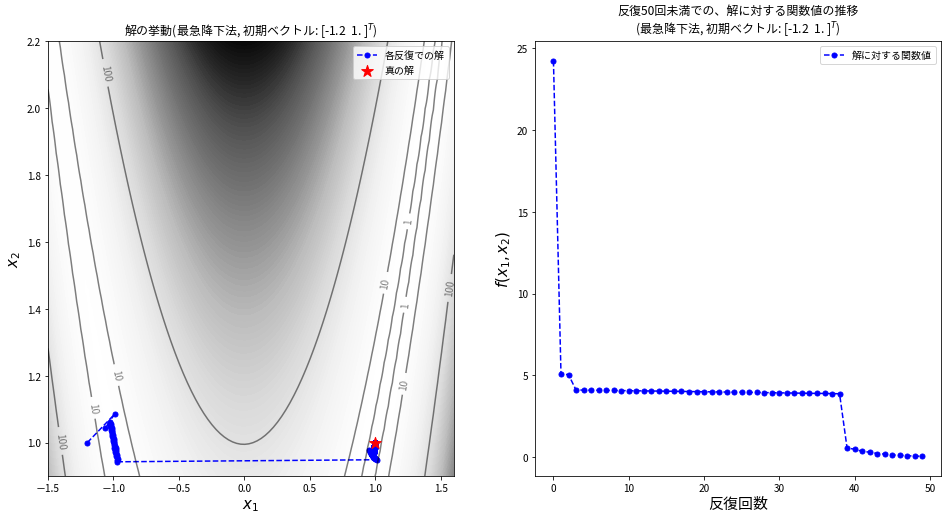

In [3]:
gd_1 = gradient_decent(
    x_1, objective_func, gradient_vector, n_iter=5000)
plot_result(
    gd_1, [0.99, 1.21], [0.99, 1.3],
    [1, 6, 10], np.linspace(0, 25, 100),
    objective_func, '最急降下法', x_1)
gd_2 = gradient_decent(
    x_2, objective_func, gradient_vector, n_iter=5000)
plot_result(
    gd_2, [-1.5, 1.6], [0.9, 2.2],
    [1, 10, 100], np.linspace(0, 500, 100),
    objective_func, '最急降下法', x_2)

勾配が小さいところでは更新の大きさが小さくなる傾向がみられる。

---

つぎに、ニュートン法を適用する。

数回程度の反復で真の解に収束したので、その時点で反復は止めてある。

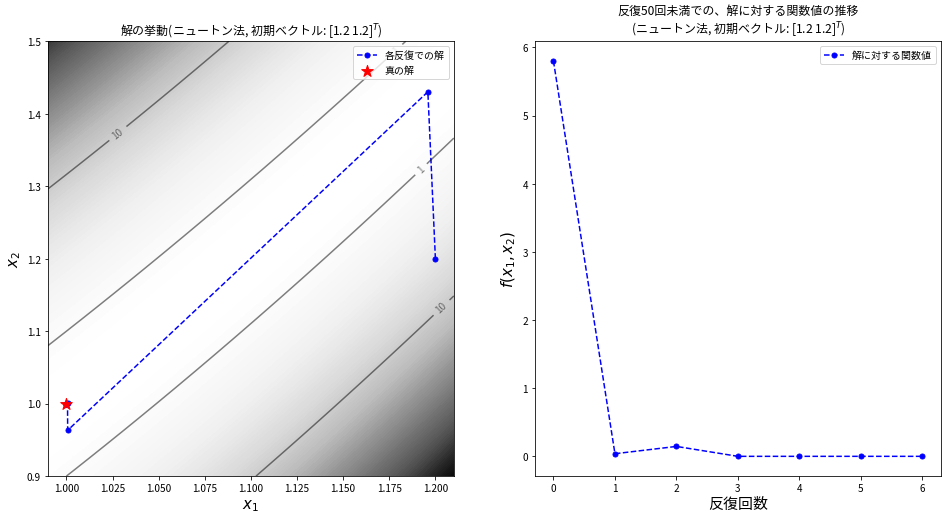

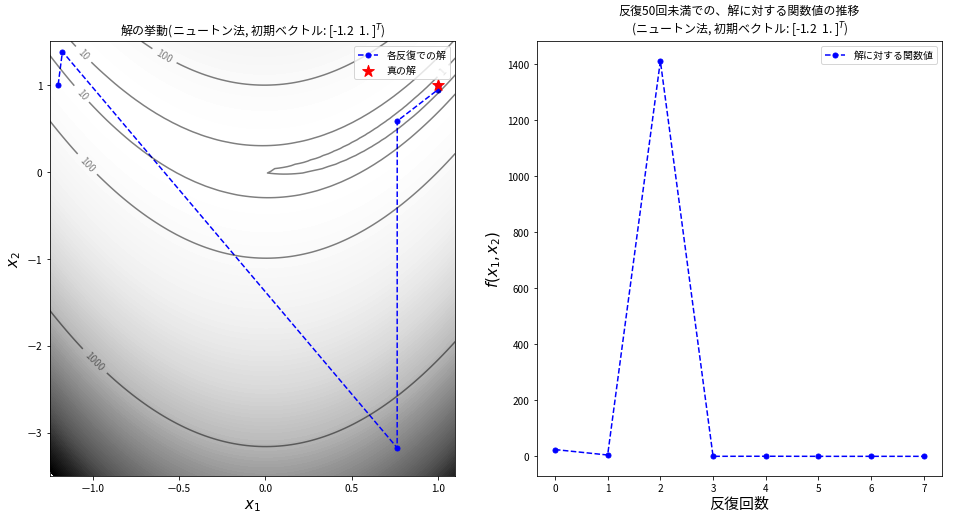

In [4]:
newton_1 = newton(x_1, hessian, gradient_vector, n_iter=6)
plot_result(
    newton_1, [0.99, 1.21], [0.90, 1.5],
    [1, 10], np.linspace(0, 33, 100),
    objective_func, 'ニュートン法', x_1)

newton_2 = newton(x_2, hessian, gradient_vector, n_iter=7)
plot_result(
    newton_2, [-1.25, 1.1], [-3.5, 1.5],
    [1, 10, 100, 1000], np.linspace(0, 2500, 100),
    objective_func, 'ニュートン法', x_2)

どちらの場合でも数回で真の解に到達している。

In [5]:
print(newton_1)

[[1.2        1.2       ]
 [1.19591837 1.43020408]
 [1.00065062 0.96317217]
 [1.00057519 1.00115071]
 [1.         0.99999967]
 [1.         1.        ]
 [1.         1.        ]]


In [6]:
print(newton_2)

[[-1.2         1.        ]
 [-1.1752809   1.38067416]
 [ 0.76311487 -3.17503385]
 [ 0.76342968  0.58282478]
 [ 0.99999531  0.94402732]
 [ 0.9999957   0.99999139]
 [ 1.          1.        ]
 [ 1.          1.        ]]


上の数値はそれぞれの初期値に対する解の推移であり、真の解に到達していることが確認できる。

---

最後に、準ニュートン法を適用する。

ステップ幅$\alpha_k$は、最急降下法と同様に、Wolfeの条件を満たすようにバックトラックで求めた。

パラメータは最急降下法と同じ値にした。
初期値は$\alpha = 1$、Wolfeの条件の減少条件(Almijoの条件)の定数は$c_1 = 0.0001$、曲率条件の定数は$c_2 = 0.9$、$\alpha ← \rho \alpha$の更新での定数は$\rho = 0.5$とした。

また、更新方向を定める行列${B_k}^{-1} = H_k$は、BFGS公式により$H_k$行列を直接求めて更新した。
初期値$H_0$は、初期解でのヘッセ行列の逆行列にした。

反復は5000回行った。

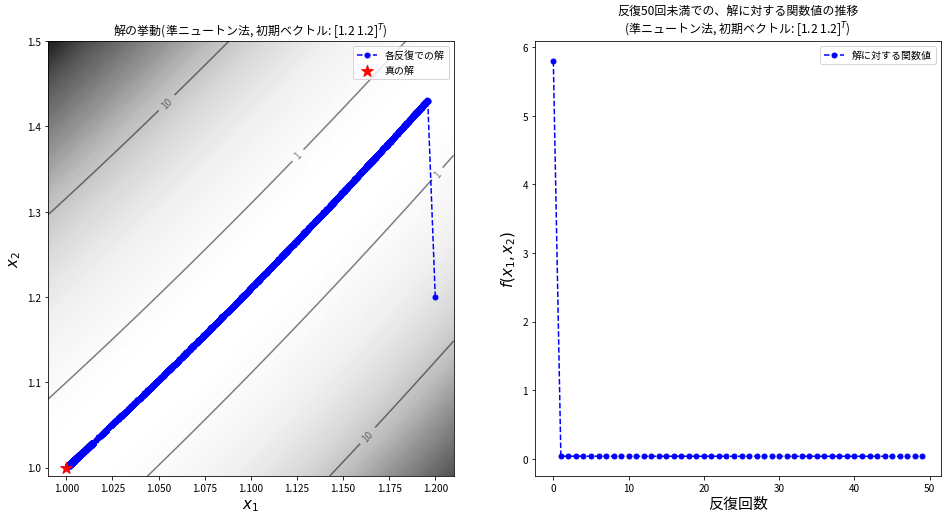

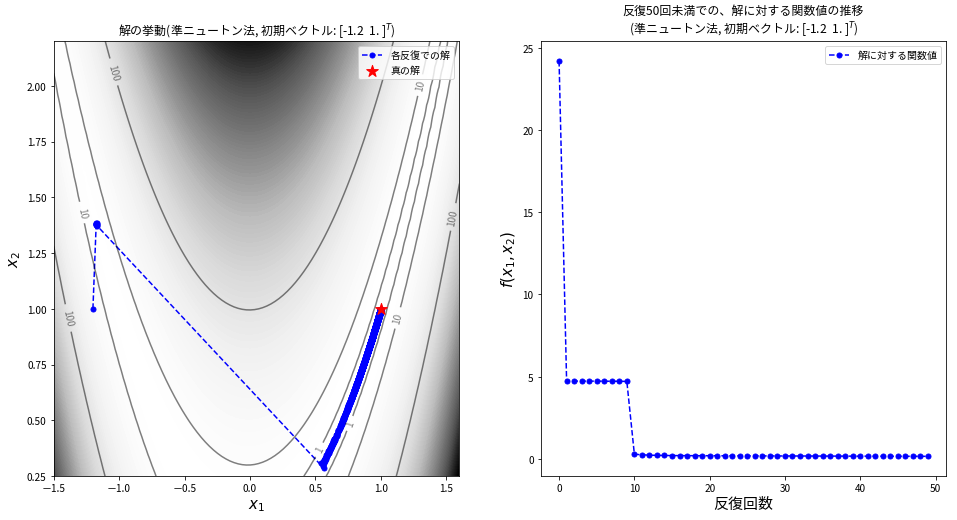

In [7]:
q_newton_1 = quasi_newton(
    x_1, objective_func, gradient_vector, hessian, n_iter=5000)
plot_result(
    q_newton_1, [0.99, 1.21], [0.99, 1.5],
    [1, 10], np.linspace(0, 30, 100),
    objective_func, '準ニュートン法', x_1)
q_newton_2 = quasi_newton(
    x_2, objective_func, gradient_vector, hessian, n_iter=5000)
plot_result(
    q_newton_2, [-1.5, 1.6], [0.25, 2.2],
    [1, 10, 100], np.linspace(0, 525, 100),
    objective_func, '準ニュートン法', x_2)

In [8]:
print(q_newton_2)

[[-1.2         1.        ]
 [-1.1752809   1.38067416]
 [-1.17479706  1.38395027]
 ...
 [ 0.99781212  0.99561404]
 [ 0.99780898  0.99561989]
 [ 0.9978153   0.99562101]]


上の数値は、準ニュートン法で初期点が$(-1.2, 1)^T$の場合の解の数値の推移である。

最初の1～2更新で大幅に更新されていることが確認できる。